In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Directory:", os.getcwd())

%cd C:\Users\Felipe\Desktop
print("Changed to Directory:", os.getcwd())


Current Directory: C:\Users\Felipe
C:\Users\Felipe\Desktop
Changed to Directory: C:\Users\Felipe\Desktop


In [3]:
data = pd.read_excel('C:/Users/Felipe/Desktop/assetment-bookmaker (3).xlsx', index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447 entries, 2022-08-04 to 2023-09-24
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   # Clicks                     269 non-null    float64
 1   # Registros IN               424 non-null    float64
 2   # Primer depósito IN         424 non-null    float64
 3   Total depositado IN          404 non-null    float64
 4   # Personas que apostaron IN  404 non-null    float64
 5   Total apostado               404 non-null    float64
 6   Net revenue IN               404 non-null    float64
dtypes: float64(7)
memory usage: 27.9 KB


In [5]:
data.isna().sum()

# Clicks                       178
# Registros IN                  23
# Primer depósito IN            23
Total depositado IN             43
# Personas que apostaron IN     43
Total apostado                  43
Net revenue IN                  43
dtype: int64

In [6]:
#Limpiar nulos

In [7]:
data = data.dropna(subset=['Net revenue IN'])

In [8]:
data = data.fillna(data.mean())

In [9]:
data

,# Clicks,# Registros IN,# Primer depósito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
Periodo,,,,,,,
2022-11-03,1584.969027,0.0,0.0,194.524900,1.0,194.524900,160.483043
2022-11-04,1584.969027,0.0,0.0,0.000000,1.0,44.174122,6.675201
2022-11-05,1584.969027,0.0,0.0,0.000000,1.0,27.940599,-38.264751
2022-11-06,1584.969027,0.0,0.0,0.000000,1.0,66.087881,66.087881
2022-11-08,1584.969027,0.0,0.0,97.724580,1.0,368.705058,78.179664
...,...,...,...,...,...,...,...
2023-09-22,1584.969027,0.0,0.0,20.337191,1.0,60.688212,16.547864
2023-09-23,1584.969027,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
2023-09-23,1584.969027,0.0,0.0,0.000000,1.0,17.277301,6.835713


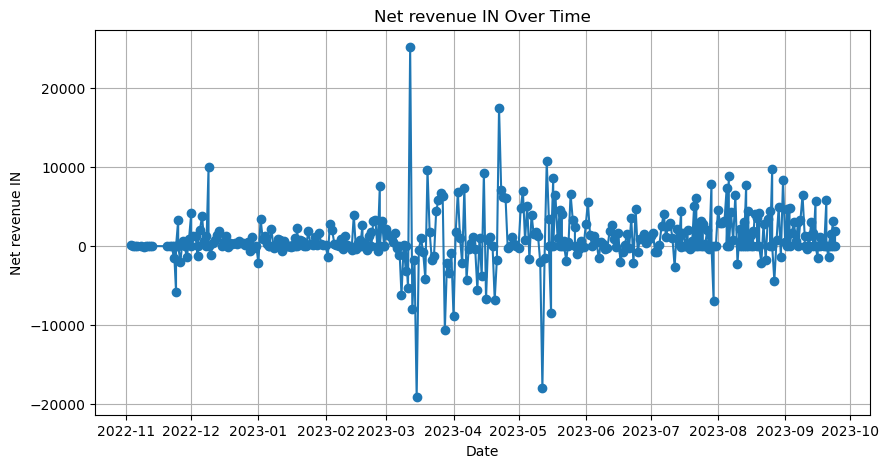

In [10]:
# Graficar los ingresos netos
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Net revenue IN'], marker='o')


plt.xlabel('Date')
plt.ylabel('Net revenue IN')
plt.title('Net revenue IN Over Time')

plt.grid(True)
plt.show()


In [11]:
# Variabilidad alta en los datos y volatilidad hasta Junio 2023. Seleccionar una muestra mas estable a partir de junio 2023)

In [12]:
data_filtered = data.loc['2023-06-01':'2023-09-24']


In [13]:
X = data_filtered.iloc[:,0:6].values  #features
Y = data_filtered.iloc[:,6].values  # Target variable

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, Y_train.shape

((125, 6), (125,))

In [17]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0, oob_score=True)

In [18]:
regressor.fit(X, Y)

C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [19]:
# Evaluando el modelo
from sklearn.metrics import mean_squared_error, r2_score

# Puntaje OOB
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.08561534262173853
Mean Squared Error: 831587.6602493597
R-squared: 0.8640667275776839


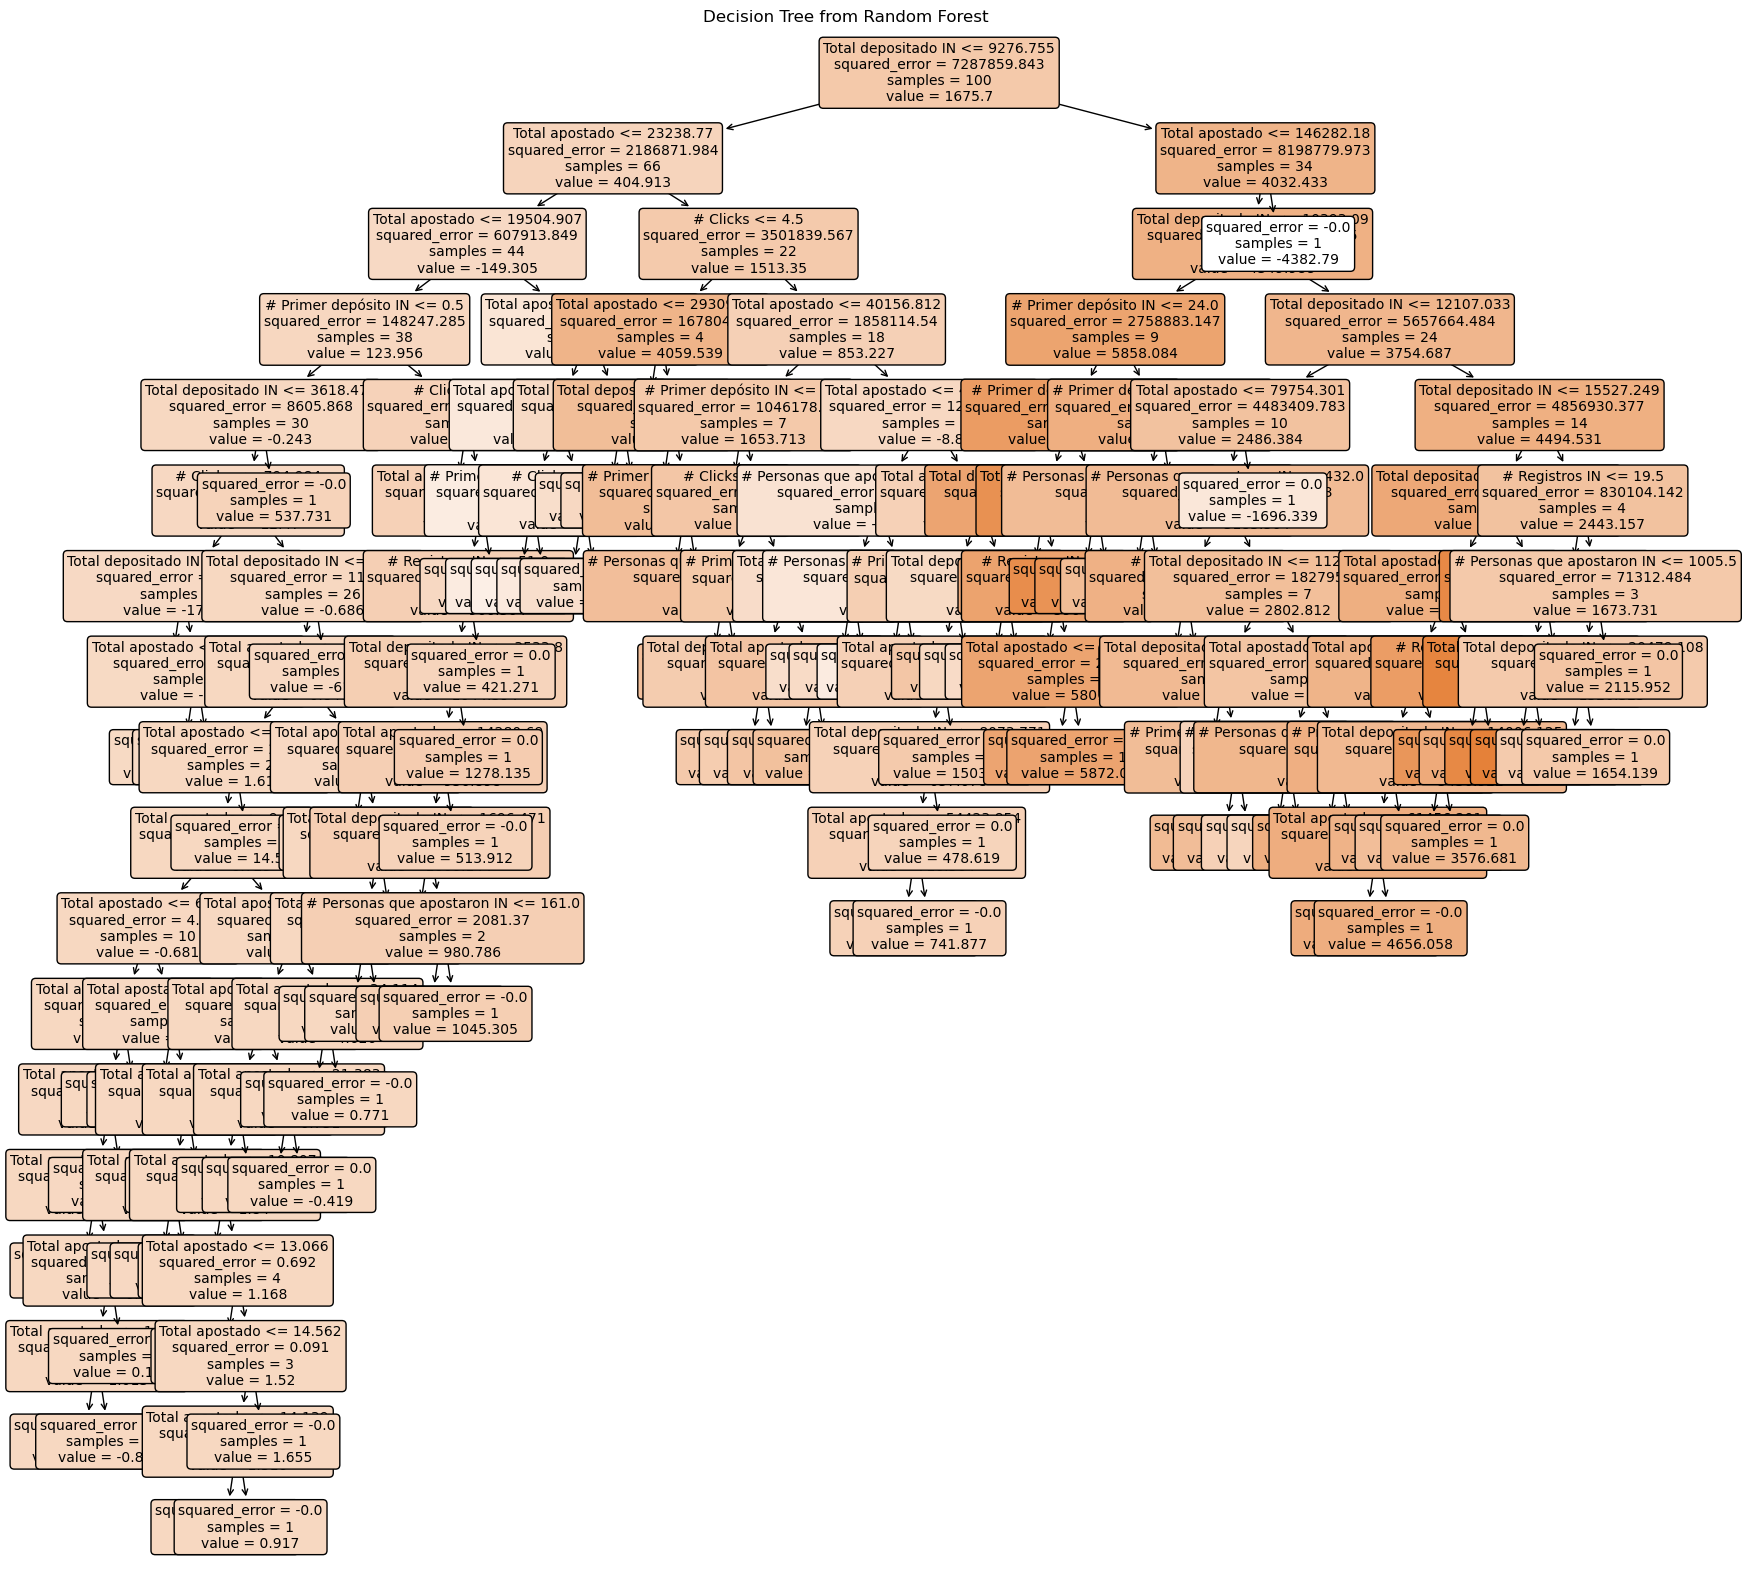

In [20]:
from sklearn.tree import plot_tree


# Selección del arbol del bosque, primer arbol (index = 0)
tree_to_plot = regressor.estimators_[0]

# Graficar el arbol de decision
plt.figure(figsize=(20, 20))
plot_tree(tree_to_plot, feature_names=data_filtered.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

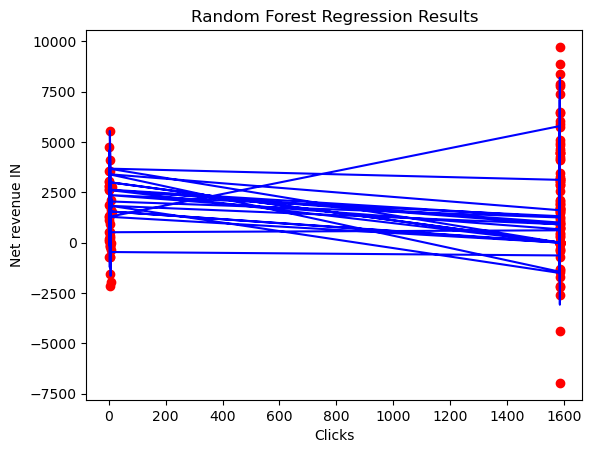

In [21]:
#Graficar resultados del proyectado vs real sobre variables
# # Clicks
plt.scatter(data_filtered['# Clicks'],Y,color = 'red')
plt.plot(data_filtered['# Clicks'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('Clicks')
plt.ylabel('Net revenue IN')
plt.show()




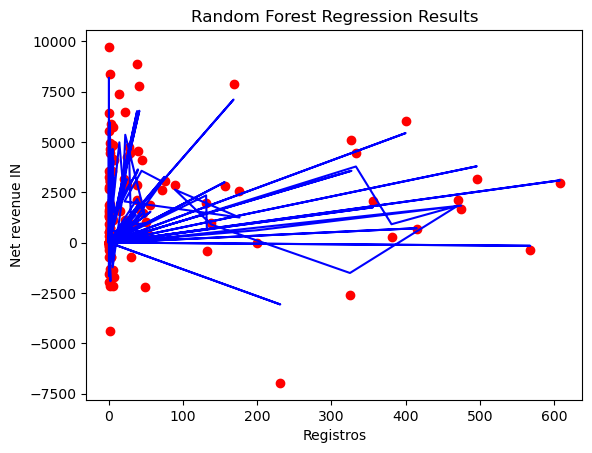

In [22]:
#Graficar resultados del proyectado vs real sobre variables
# Registros
plt.scatter(data_filtered['# Registros IN'],Y,color = 'red')
plt.plot(data_filtered['# Registros IN'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('Registros')
plt.ylabel('Net revenue IN')
plt.show()


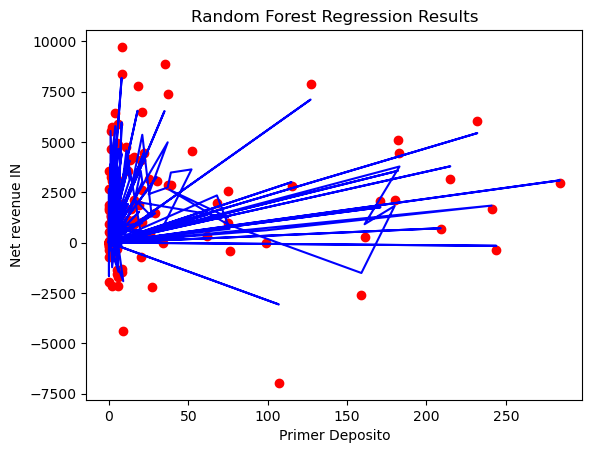

In [23]:
#Graficar resultados del proyectado vs real sobre variables
# Primer deposito
plt.scatter(data_filtered['# Primer depósito IN'],Y,color = 'red')
plt.plot(data_filtered['# Primer depósito IN'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('Primer Deposito')
plt.ylabel('Net revenue IN')
plt.show()




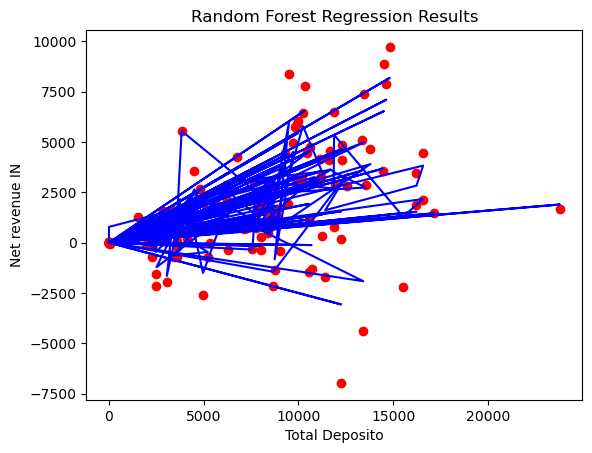

In [24]:
#Graficar resultados del proyectado vs real sobre variables
# Total deposito
plt.scatter(data_filtered['Total depositado IN'],Y,color = 'red')
plt.plot(data_filtered['Total depositado IN'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('Total Deposito')
plt.ylabel('Net revenue IN')
plt.show()


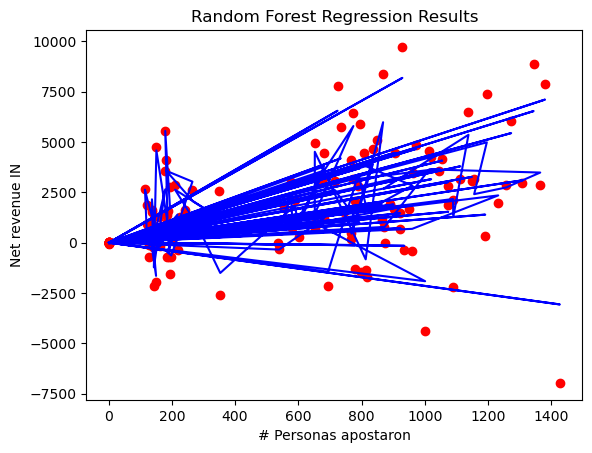

In [25]:
#Graficar resultados del proyectado vs real sobre variables
# Personas apostaron
plt.scatter(data_filtered['# Personas que apostaron IN'],Y,color = 'red')
plt.plot(data_filtered['# Personas que apostaron IN'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('# Personas apostaron')
plt.ylabel('Net revenue IN')
plt.show()



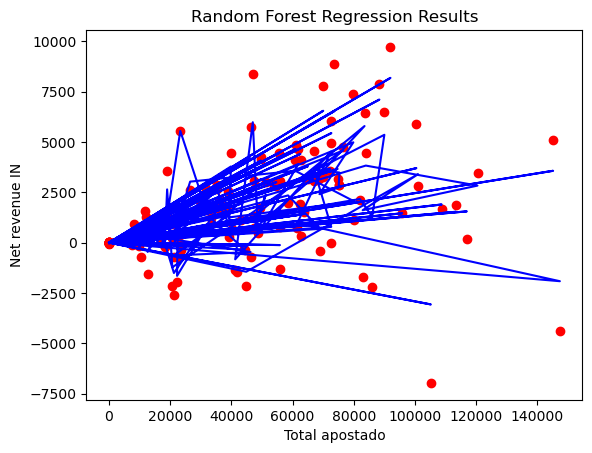

In [26]:
#Graficar resultados del proyectado vs real sobre variables
# Total apostado
plt.scatter(data_filtered['Total apostado'],Y,color = 'red')
plt.plot(data_filtered['Total apostado'], regressor.predict(X), color = 'blue')
plt.title("Random Forest Regression Results")
plt.xlabel('Total apostado')
plt.ylabel('Net revenue IN')
plt.show()



In [27]:
# Al observar la variable clicks no muestra un alto grado de bondad de ajuste entre lo pronosticado con los datos observados, se procede a realizar un modelo de bosque aleatorio sin la variable clicks. A pesar que los resultados muestran una reducción  en terminos de bondad de ajuste de todo el modelo y en los otros dos indicadores, revisando la información historica del movimiento de esa variable, se considera que no aporta al analisis del negocio ni del modelo de pronosticos

In [28]:
X = data_filtered.iloc[:,1:6].values  #features
Y = data_filtered.iloc[:,6].values  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0, oob_score=True)

In [29]:
X_train.shape, Y_train.shape

((125, 5), (125,))

In [30]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0, oob_score=True)
regressor.fit(X, Y)

C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [31]:
# Evaluando el modelo
from sklearn.metrics import mean_squared_error, r2_score

# Puntaje OOB
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.12174719467475881
Mean Squared Error: 861853.6489790193
R-squared: 0.8591193779622677


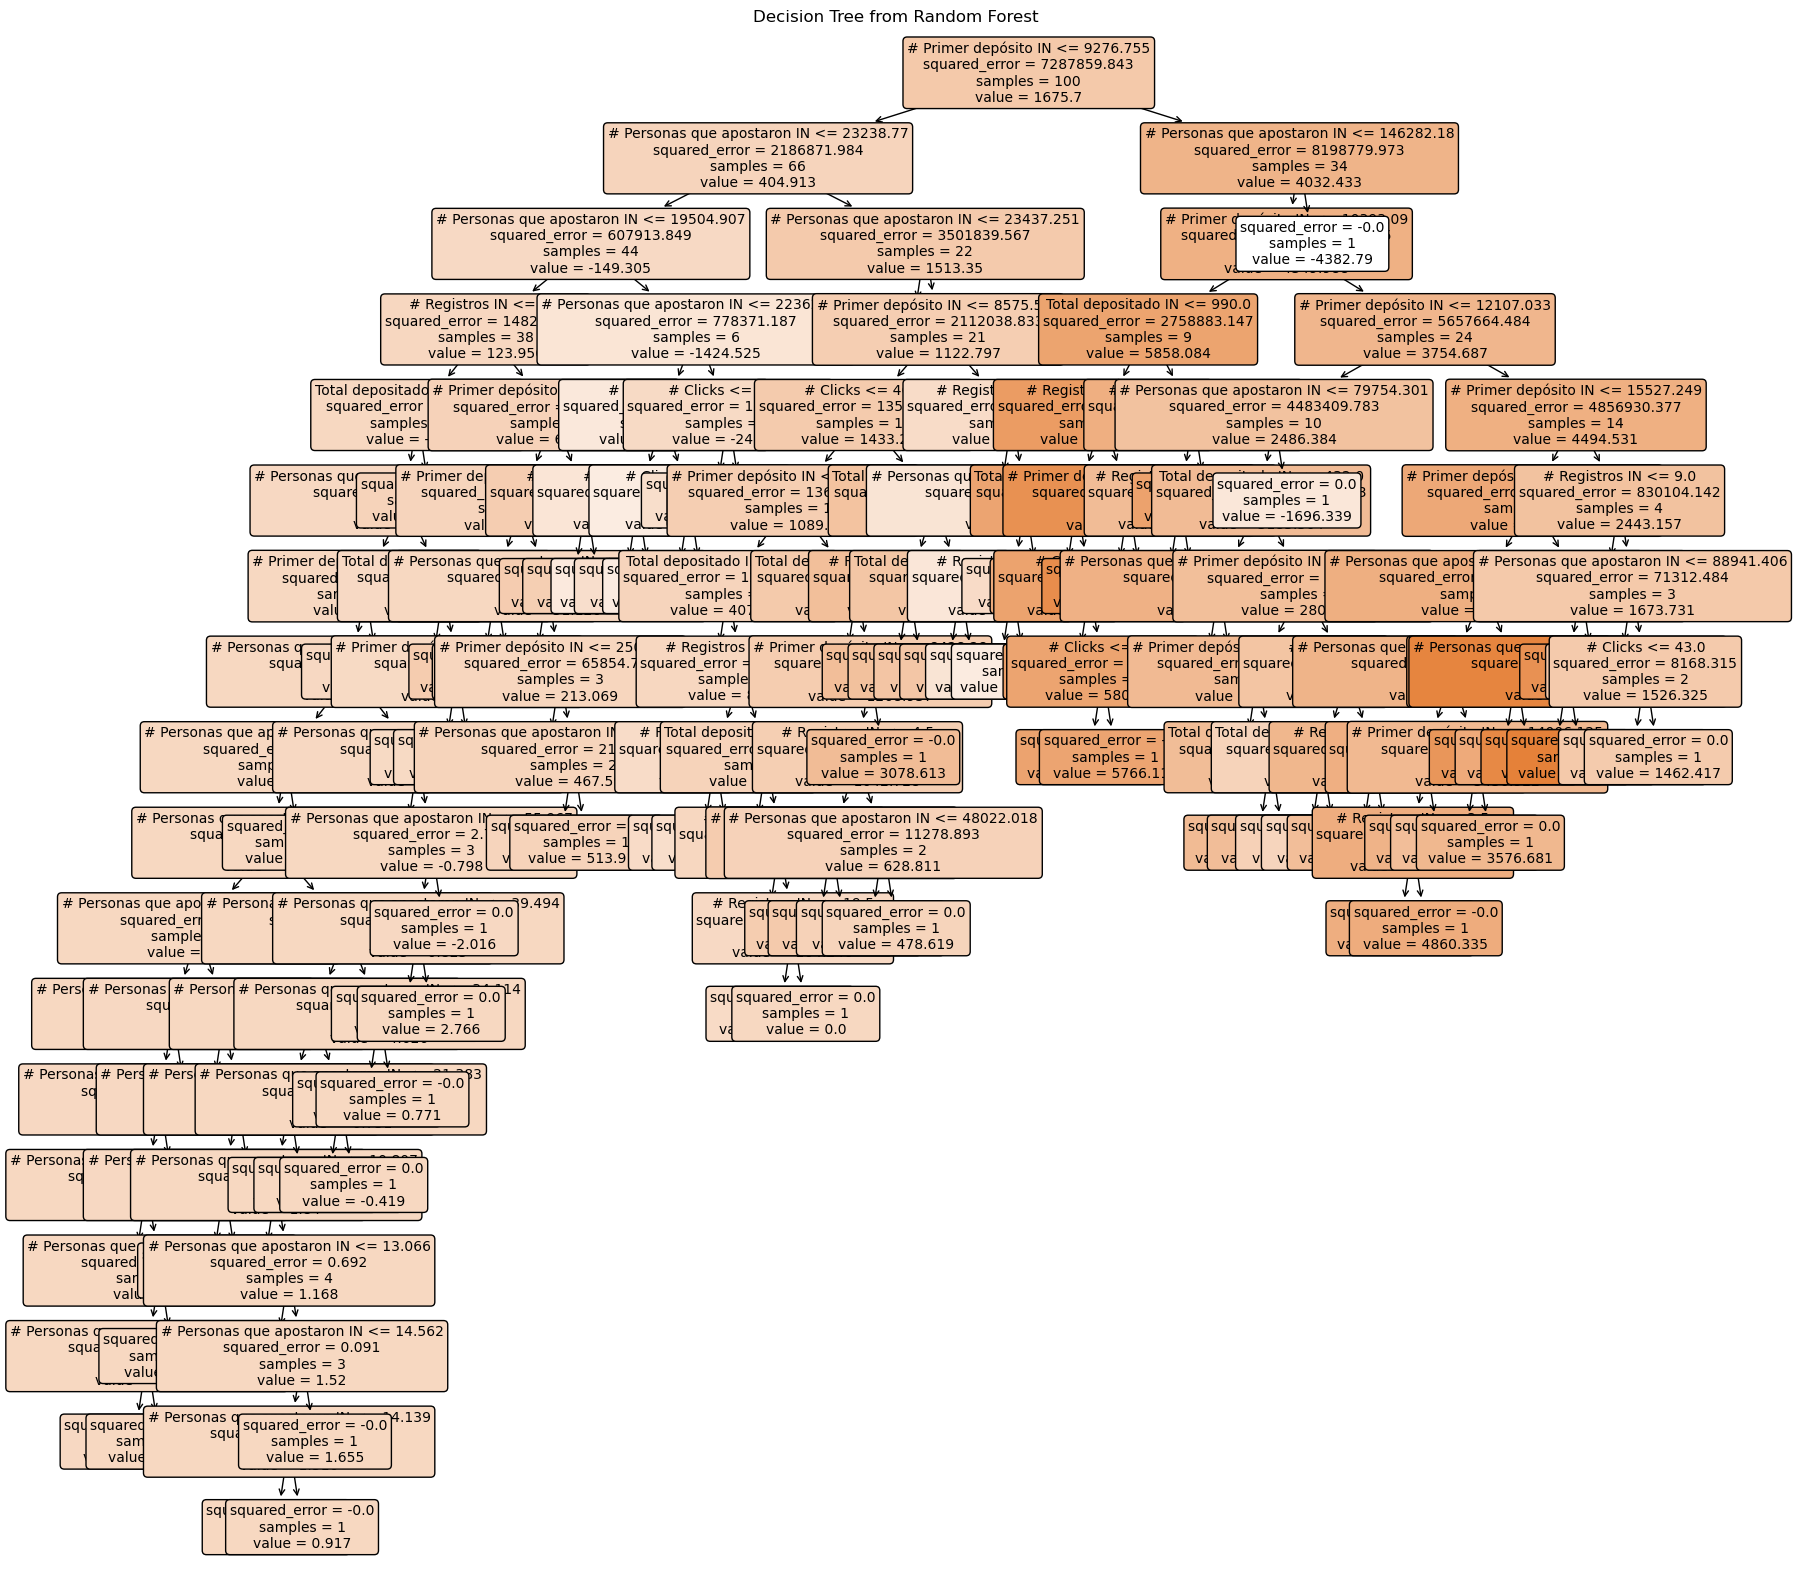

In [32]:
from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 20))
plot_tree(tree_to_plot, feature_names=data_filtered.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [33]:
# Pronosticos a dos años (700 dias)

In [40]:
P = 700
last_known_values = X_test[-1].reshape(1, -1)


# Create an empty list to store the predictions
forecast_values = []

# Forecast for 700 dates ahead
for i in range(P):
    # Predict the next value
    next_value = regressor.predict(last_known_values)[0]
    
    # Append the prediction to the forecast values list
    forecast_values.append(next_value)
    
    # Update the input (shift the lag features and add the new prediction)
    last_known_values = np.roll(last_known_values, -1)  # Shift left
    last_known_values[0, -1] = next_value  # Replace the last lag with the new prediction

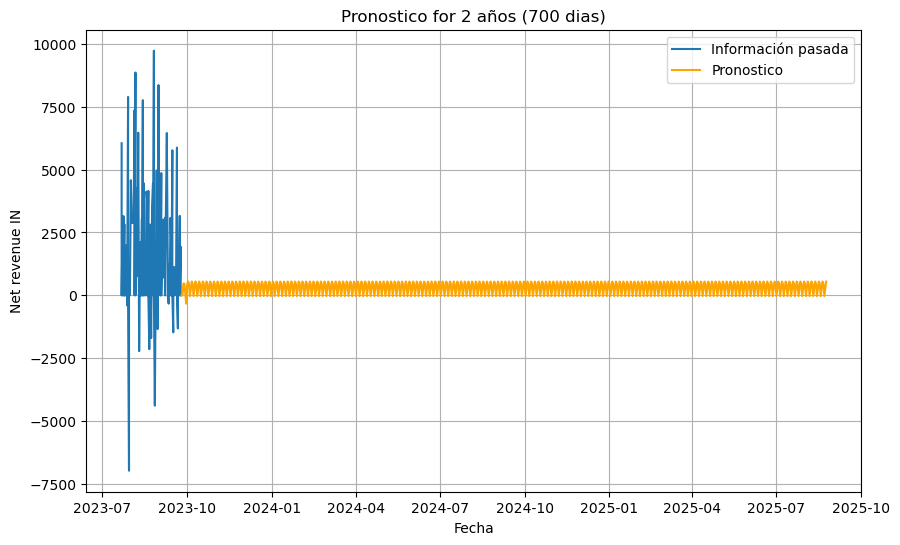

In [41]:

# Creacion de fechas futuras
future_dates = pd.date_range(start=data_filtered.index[-1] + pd.Timedelta(days=1), periods=P, freq="D")

# Guardar los resultados del pronostico
forecast_df = pd.DataFrame(forecast_values, index=future_dates, columns=['forecast'])


plt.figure(figsize=(10, 6))
plt.plot(data_filtered.index[-100:], data_filtered['Net revenue IN'].tail(100), label='Información pasada')
plt.plot(future_dates, forecast_df['forecast'], label='Pronostico', color='orange')
plt.title('Pronostico for 2 años (700 dias)')
plt.xlabel('Fecha')
plt.ylabel('Net revenue IN')
plt.legend()
plt.grid(True)
plt.show()